In [2]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

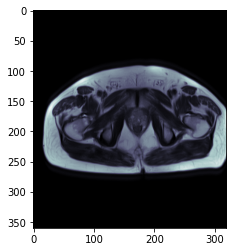

In [59]:
filePath = 'PROSTATA_1.MR.0001.0015.2021.12.22.13.14.21.169473.39474333.ima'
#img = pydicom.read_file(filePath)
img = pydicom.dcmread(filePath)
plt.imshow(img.pixel_array,cmap=plt.cm.bone)
plt.show()


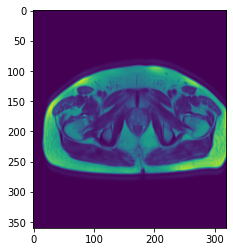

In [46]:
plt.imshow(img.pixel_array)

In [63]:
from skimage import io,viewer,exposure
from skimage.viewer.plugins.lineprofile import LineProfile
from skimage.viewer.plugins import Plugin
from skimage.viewer.widgets import Slider


img = io.imread(filePath,as_gray=True)
img.shape
img = exposure.rescale_intensity(img,in_range="image",out_range=(0,1))
#viewer = viewer.ImageViewer(img)
#viewer+=LineProfile(maxdist=100)
#viewer.show()[0]

In [8]:
print(img.pixel_array.shape)
print("max: ",img.pixel_array.max(),"\nmin: ",img.pixel_array.min())
np.mean(img.pixel_array)

(360, 320)
max:  2933 
min:  0


391.69512152777776

In [18]:
flat = img.pixel_array.flatten()
print(flat)

[0 0 0 ... 0 0 0]


In [50]:
np.histogram(img.pixel_array,bins=10)

(array([77203, 11305,  5050,  4414,  5375,  4497,  3932,  2502,   832,
           90], dtype=int64),
 array([   0. ,  293.3,  586.6,  879.9, 1173.2, 1466.5, 1759.8, 2053.1,
        2346.4, 2639.7, 2933. ]))

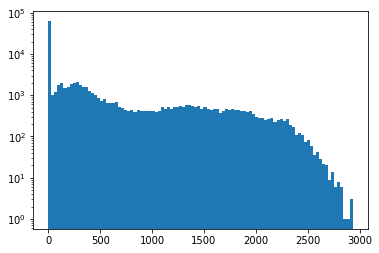

In [58]:

plt.hist(flat,bins=100,log=True,histtype="stepfilled")
plt.savefig('histograma.png')
plt.show()

In [60]:
from skimage.filters.rank import gradient

from skimage.morphology import disk

In [4]:
io.imsave("original.png",img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Pier\AppData\Local\Temp/ipykernel_7108/3346324377.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out = gradient(img, disk(1))


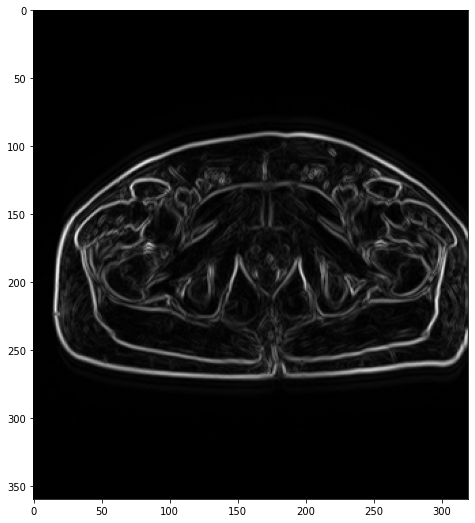

In [127]:
out = gradient(img, disk(1))
io.imsave("bordes.png",out)
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(out,cmap="gray")


In [ ]:
from skimage.filters import prewitt

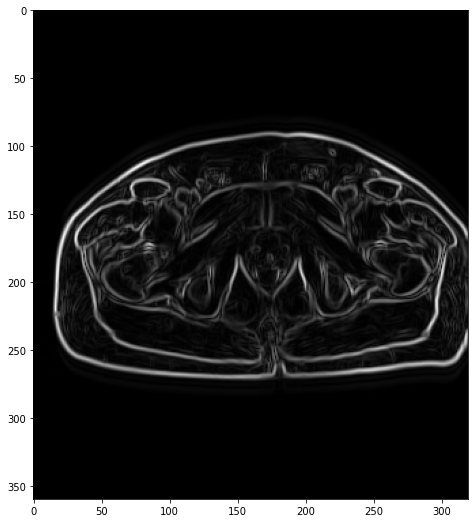

In [71]:
out = prewitt(img)
#io.imsave("bordes.png",out)
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(out,cmap="gray")